In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load data
filename='/content/drive/MyDrive/Coding Dojo/Week 3/DP_LIVE_18102020154144776.csv'
hs=pd.read_csv(filename)
hs.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,PC_GDP,A,1971,4.547,NaN
1,AUS,HEALTHEXP,TOT,PC_GDP,A,1972,4.547,NaN
2,AUS,HEALTHEXP,TOT,PC_GDP,A,1973,4.511,NaN
3,AUS,HEALTHEXP,TOT,PC_GDP,A,1974,5.112,NaN
4,AUS,HEALTHEXP,TOT,PC_GDP,A,1975,5.760,NaN


In [60]:
hs.drop(columns=['Flag Codes'],inplace=True)

In [61]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16683 entries, 0 to 16682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   16683 non-null  object 
 1   INDICATOR  16683 non-null  object 
 2   SUBJECT    16683 non-null  object 
 3   MEASURE    16683 non-null  object 
 4   FREQUENCY  16683 non-null  object 
 5   TIME       16683 non-null  int64  
 6   Value      16683 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 912.5+ KB


In [62]:
# Average health spending change over time
filter_health=hs['MEASURE']=='PC_HEALTHXP'
hs_mean=hs[filter_health].groupby(['TIME'])[['Value']].mean()

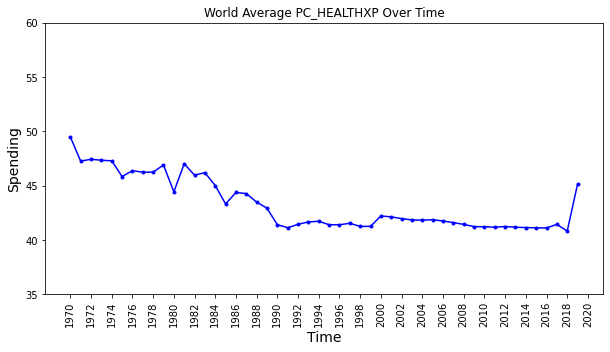

In [26]:
plt.figure(figsize=(10,5))
plt.plot(hs_mean.index,hs_mean['Value'],marker='.',c='b')
plt.ylim(bottom=35,top=60)
plt.xticks(np.arange(1970,2021,step=2),rotation=90)
plt.title('World Average PC_HEALTHXP Over Time')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Spending',fontsize=14);

In [20]:
# Average Per Capita GDP change over time
filter_gdp=hs['MEASURE']=='PC_GDP'
gdp_mean=hs[filter_gdp].groupby(['TIME'])[['Value']].mean()

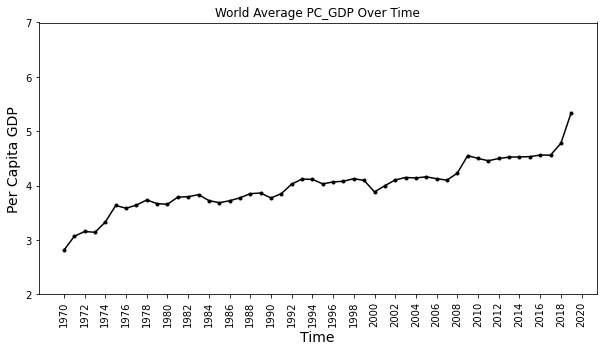

In [25]:
plt.figure(figsize=(10,5))
plt.plot(gdp_mean.index,gdp_mean['Value'],marker='.',c='k')
plt.ylim(bottom=2,top=7)
plt.xticks(np.arange(1970,2021,step=2),rotation=90)
plt.title('World Average PC_GDP Over Time')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Per Capita GDP',fontsize=14);

In [63]:
filter_year=hs['TIME']==2019

In [64]:
# Top 5 locations with high health spending in 2019
hs.loc[filter_health & filter_year,:].sort_values(by=['Value'],ascending=False).head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
12255,NOR,HEALTHEXP,COMPULSORY,PC_HEALTHXP,A,2019,85.352
13471,SWE,HEALTHEXP,COMPULSORY,PC_HEALTHXP,A,2019,85.226
9223,DEU,HEALTHEXP,COMPULSORY,PC_HEALTHXP,A,2019,84.989
14467,USA,HEALTHEXP,COMPULSORY,PC_HEALTHXP,A,2019,84.779
11298,LUX,HEALTHEXP,COMPULSORY,PC_HEALTHXP,A,2019,84.505


In [81]:
filter_nor=hs['LOCATION']=='NOR'
filter_swe=hs['LOCATION']=='SWE'
filter_deu=hs['LOCATION']=='DEU'
filter_usa=hs['LOCATION']=='USA'
filter_lux=hs['LOCATION']=='LUX'
filter_sub=hs['SUBJECT']=='COMPULSORY'

In [84]:
# Create dateframe for locations with high health spending in 2019
hs1=hs[filter_health & filter_sub & (filter_deu | filter_nor | filter_lux | filter_swe | filter_usa)]

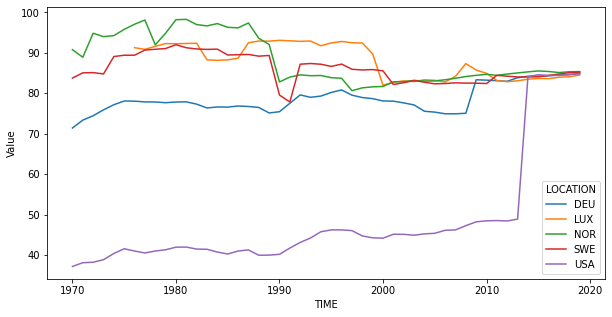

In [100]:
# See how the health spending change over time for the 5 locations
plt.figure(figsize=(10,5))
sns.lineplot(data=hs1,x='TIME',y='Value',hue='LOCATION');

In [92]:
# See the change of health spending over time for USA
hs_usa=hs[filter_usa & filter_health]

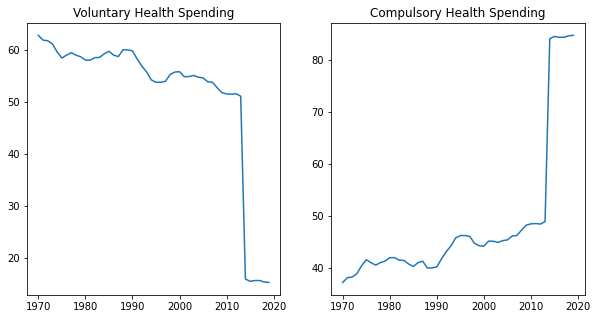

In [98]:
# Comparison between voluntary health spending and compulsory health spending
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hs_usa[hs_usa['SUBJECT']=='VOLUNTARY']['TIME'],hs_usa[hs_usa['SUBJECT']=='VOLUNTARY']['Value'])
plt.title('Voluntary Health Spending')

plt.subplot(1,2,2)
plt.plot(hs_usa[hs_usa['SUBJECT']=='COMPULSORY']['TIME'],hs_usa[hs_usa['SUBJECT']=='COMPULSORY']['Value'])
plt.title('Compulsory Health Spending');
